# DOPP 2020W Exercise 1
## Butterflies

== *_Due date: November 3rd, 2020. 23:59 CEST_* ==

The authors of scientific article on butterfly wing shapes [ 1 ] have made the data on which their analysis is based publicly available [ 2 ]. You are  asked to re-analyse that data. 

The data used by the article's authors is stored as an XLS file, with records spread over 10 sheets. In a first step, you have to load the data into Python and organize it before doing any analysis.

The aim of this exercise is to import some of the data from the XLSX file into Python and output a CSV file. The data to import and export into the CSV file must refer to the Experimental Brood only. The CSV file must contain a single grid with (one or more) columns:
* Name
* Sex
* Genotype
* Phenotype
* Wing perimeter
* Landmarks

The CSV file must contain one line for each "name" in the Experimental Brood sheet. The column headings for the landmarks should be "landmark 1 x", "landmark 1 y", "landmark 2 x", "landmark 2 y", …

<span style="color:red;font-weight:bold;">Important:</span> 
* You are <span style = "font-weight:bold">not allowed</span> to use NumPy, SciPy, or Pandas.
* The code must run on JupyterHub (here!). If the code does not run, you will not get the points for the non-running cells.
* Do not create global variables as they might be overriden!
* Task 5 will not be graded if you didn't attempt the previous tasks as well
* _Don't forget about the Quiz on TUWEL_, otherwise you won't be able to reach the full 100 points for this exercise.


[1] Jones, R.T., Poul, Y.L., Whibley, A.C., Mérot, C., ffrench‐Constant, R.H. and Joron, M. (2013), WING SHAPE VARIATION ASSOCIATED WITH MIMICRY IN BUTTERFLIES. Evolution, 67: 2323-2334. <a href = "doi:10.1111/evo.12114"> doi:10.1111/evo.12114 </a>

[2] <a href = "https://datadryad.org/stash/dataset/doi:10.5061/dryad.1s15q"> https://datadryad.org/stash/dataset/doi:10.5061/dryad.1s15q </a> and "WING paper Data for repository.xlsx" on JupyterHub.

In [1]:
import csv
import re
import matplotlib.pyplot as plt
import xlrd

# you may add more packages from the Python standard library (but not remove the packages above!)

## Task 1 (25 points)

Implement the function `load_data`.

This function takes an excel filepath as input and returns a dictionary which contains the data from the file. Every sheet and its content in the excel file corresponds to a key value pair in the dictionary. Rows will be encoded as lists of values and therefore a sheet becomes a list of lists.

Here is an example dictionary to showcase how the output should look like:

```python
{
    "sheet name": [
        ["column name 1", "column name 2"],
        ["first row string", 12.5],
        ["second row string", 5.5],
        ...
    ],
    ...
}
```

### Note

- Use the library `xlrd` to read the excel file
- Apply datatype conversions if possible e.g. `"12.5"` -> `12.5`
- Do not change sheet or column names e.g. lowercasing etc.
- Do not change row or column order of the tables
- Remove rows that do not represent data content e.g. descriptions, empty rows etc.
- Keep column names if they are present in the first row

In [28]:
def load_data(excel_path):
    """
    Load data from excel file
    
    Parameters
    ----------
    excel_path : str
        Path to wing paper excel file (.xlsx)
    
    Returns
    -------
    data : dictionary of list of lists
        Table data from wing paper excel file for all sheets
    """
    
    data = {}
    
    book = xlrd.open_workbook(excel_path)
    
    for sheet in book.sheets():
        rows = []
        
        for row_idx in range(sheet.nrows):
            num_empty = 0
            row = []
            
            for cell in sheet.row(row_idx):
                if cell.ctype != 5:
                    row.append(cell.value)
                if cell.value == '':
                    num_empty += 1
            
            # stop when empty row is reached
            if num_empty == sheet.ncols:
                break
            
            rows.append(row)
        
        data[sheet.name] = rows
    
    return data

In [29]:
DATA = load_data("WING paper Data for repository.xlsx")

In [40]:
print(DATA["Outline analysis -wild"])
print(len(DATA["Outline analysis -wild"]))

[['File Name', 'Wing', 'Genotype 1', 'Genotype 2', 'sex', 'ind Name', 'side', 'left/right', 'PCA scores', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', 'axis Variance', 0.51846, 0.18055, 0.11722, 0.049023, 0.039156, 0.021819, 0.015369, 0.0099595, 0.0098939, 0.0059152, 0.0044888, 0.0037377, 0.0032133, 0.0027517, 0.0023736, 0.002074, 0.0018161, 0.0013177, 0.0012436, 0.0010728, 0.00099258, 0.00085788, 0.0008192, 0.00060131, 0.00052025, 0.00048905, 0.00043719, 0.00040797, 0.00036271, 0.00033139, 0.00028332, 0.00024619, 0.00022656, 0.00021054, 0.0001817, 0.00016524, 0.00015404, 0.00013291, 0.00012791, 0.0001124, 0.00010499, 8.759e-05, 7.9465e-05, 7.0959e-05, 6.2059e-05, 5.7076e-05, 5.1736e-05, 4.

In [45]:
# to make sure you have the right data structure
assert isinstance(DATA, dict)
assert all(isinstance(k, str) and isinstance(v, list) for k, vs in DATA.items() for v in vs)

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

## Task 2 (20 points)

Implement the function `landmark_coordinates_table`.

The sheet "Landmark coordinates" encodes wing color pattern landmark coordinates in a special format. Convert the contents of this sheet into a plain table format. The column headings of this table should be `name, landmark 1 x, landmark 1 y, landmark 2 x, landmark 2 y, ...`. The enumeration of the landmarks corresponds to the position in the list of the special format. The `name` column should contain the name of the organism which the landmarks belong to.

### Note

- Include the new column headings as the first row in the output

In [65]:
def landmark_coordinates_table(data):
    """
    Transform landmark coordinates sheet data from special format to table format described in Task 2
    
    Parameters
    ----------
    data : dictionary of list of lists
        Data loaded from your `load_data` function in Task 1
    
    Returns
    -------
    output : list of lists
        Transformed landmark coordinates from landmark coordinates sheet
    """
    
    output = []
    
    new_row = [""]
    num_landmarks = 0
    
    for row in data["Landmark coordinates"]:
        if len(row) == 2:
            new_row += row
            
        elif row[0].startswith("ID="):
            id_idx = int(row[0].split("=")[1]) + 1
            new_row[0] = data["Landmark details"][id_idx][2] # name
            
            output.append(new_row)
            new_row = [""]
        
        elif row[0].startswith("LM="):
            num_landmarks = max(num_landmarks, int(row[0].split("=")[1]))
    
    headings = ["name"]
    
    for i in range(num_landmarks):
        headings += [f"landmark {i + 1} x", f"landmark {i + 1} y"]
    
    output = [headings] + output
    
    return output

In [66]:
DATA["Landmark coordinates"] = landmark_coordinates_table(DATA)

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

## Task 3 (15 points)

Implement the function `build_csv`.

Write a CSV file which contains the following data for each "name" in the "Experimental brood" sheet:

- name
- sex
- genotype
- phenotype
- wing perimeter
- landmark 1 x, landmark 1 y, landmark 2 x, ...

The CSV file should be written to the path provided by the argument `output_path`.

### Note

- The column headings must be named as in the bullet list above i.e. lowercase, singular etc.
- If some cells in the table don't have values then they should be empty
- The order of the rows or columns doesn't matter

In [68]:
print(DATA["Experimental brood"])

[['name ', 'sex', 'genotype', 'phenotype'], [725.0, 'female', 'a-e', 'elegans'], [726.0, 'female', 'a-s', 'aurora'], [735.0, 'female', 's-s', 'silvana'], [736.0, 'female', 'a-e', 'elegans'], [738.0, 'male', 'a-e', 'elegans'], [739.0, 'male', 'a-s', 'aurora'], [740.0, 'female', 'a-e', 'elegans'], [742.0, 'male', 's-s', 'silvana'], [755.0, 'female', 'a-e', 'elegans'], [759.0, 'male', 'e-s', 'elegans'], [760.0, 'female', 'a-s', 'aurora'], [771.0, 'male', 'a-e', 'elegans'], [772.0, 'male', 'a-s', 'aurora'], [773.0, 'male', 's-s', 'silvana'], [788.0, 'female', 'a-s', 'aurora'], [789.0, 'male', 'a-s', 'aurora'], [790.0, 'male', 'a-e', 'elegans'], [791.0, 'male', 'e-s', 'elegans'], [792.0, 'female', 'a-e', 'elegans'], [804.0, 'female', 's-s', 'silvana'], [814.0, 'female', 'a-s', 'aurora'], [815.0, 'male', 'a-e', 'elegans'], [823.0, 'female', 'e-s', 'elegans'], [824.0, 'male', 's-s', 'silvana'], [840.0, 'male', 's-s', 'silvana'], [841.0, 'female', 's-s', 'silvana'], [842.0, 'male', 'e-s', 'ele

In [75]:
def build_csv(data, output_path):
    """
    Build and write a CSV file
    
    Parameters
    ----------
    data : dictionary of list of lists
        Data loaded from your `load_data` function from Task 1 and modified in Task 2
    output_path : str
        Path to store CSV file to
    """
    
    with open(output_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        
        has_header = False
        
        for row_eb, row_wp, row_l in zip(DATA["Experimental brood"],
                                         DATA["Wing perimeter"],
                                         DATA["Landmark coordinates"]):
            if has_header:
                writer.writerow(row_eb + row_wp[2:] + row_l[1:])
                continue
            
            writer.writerow(row_eb + ["wing perimeter"] + row_l[1:])
            has_header = True

In [76]:
build_csv(DATA, "wings.csv")

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

## Task 4 (10 points)

Implement the function `plot_histogram`.

Use matplotlib to inspect the distribution of wing perimeters by plotting a histogram of the wing perimeters. 

Choose appropriate parameters/labels for:
- bins
- axis labels
- title

In [110]:
def plot_histogram(csv_path):
    """
    Plot histogram of wing perimeter values from the CSV file created by `build_csv` in Task 3
    
    Parameters
    ----------
    csv_path : str
        Path where the CSV file is stored
    """
    with open(csv_path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        perimeters = [float(row["wing perimeter"]) for row in reader]
    
    fig, ax = plt.subplots(1,1)
    
    ax.hist(perimeters)
    
    ax.set_title("histogram of wing perimiters")
    ax.set_xlabel("wing perimeter")
    ax.set_ylabel("frequency")
    
    plt.show()

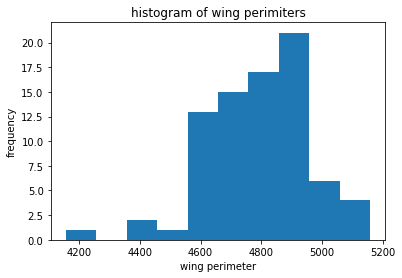

In [111]:
plot_histogram("wings.csv")

## Task 5 (10 points) 

<span style = "font-weight:bold;">Reflection</span> 

Write in the field below your observations about the Dryad data set. For example: Were there any discrepancies in the data set? If yes, how did you handle them? Size of the broods, etc.

<span style = "font-weight:bold;">Important note:</span> Points on this task will not be awarded if you didn't attempt the previous tasks as well.

YOUR ANSWER HERE